In [1]:

!pip install -q opencv-python-headless


📤 Upload reference image (e.g., boomerang):


Saving تصویر صفحه 2025-07-06 131243.png to تصویر صفحه 2025-07-06 131243 (2).png
✅ Reference image 'تصویر صفحه 2025-07-06 131243 (2).png' loaded.

📤 Upload target image (with multiple shapes):


Saving تصویر صفحه 2025-07-06 131235.png to تصویر صفحه 2025-07-06 131235 (6).png
✅ Target image 'تصویر صفحه 2025-07-06 131235 (6).png' loaded.


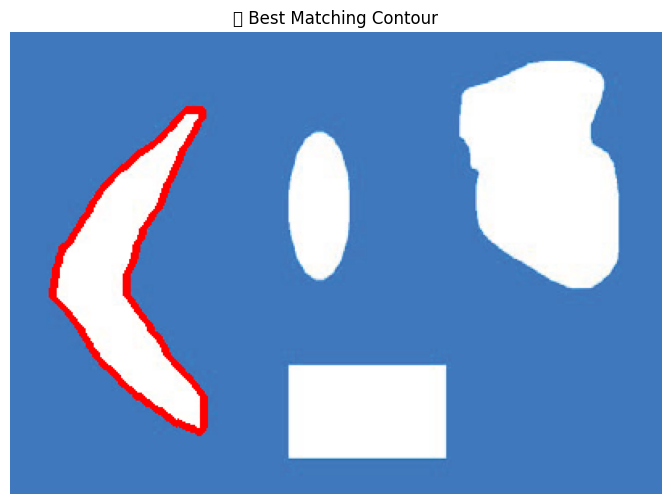

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files
import io

# Upload reference image
print("📤 Upload reference image (one shape):")
uploaded_ref = files.upload()
ref_img = None
for name in uploaded_ref:
    ref_img = Image.open(io.BytesIO(uploaded_ref[name])).convert('RGB')
    ref_img = cv2.cvtColor(np.array(ref_img), cv2.COLOR_RGB2BGR)
    print(f"✅ Reference image '{name}' loaded.")

# Upload target image
print("\n📤 Upload target image (with multiple shapes):")
uploaded_target = files.upload()
target_img = None
for name in uploaded_target:
    target_img = Image.open(io.BytesIO(uploaded_target[name])).convert('RGB')
    target_img = cv2.cvtColor(np.array(target_img), cv2.COLOR_RGB2BGR)
    print(f"✅ Target image '{name}' loaded.")

# Define contour extraction functions
def get_ref_contour(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        img_area = img.shape[0] * img.shape[1]
        if 0.05 < area / float(img_area) < 0.8:
            return contour
    return None

def get_all_contours(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Match shapes
ref_contour = get_ref_contour(ref_img)
input_contours = get_all_contours(target_img)

if ref_contour is None or not input_contours:
    print("⚠️ Could not extract contours properly.")
else:
    closest_contour = input_contours[0]
    min_dist = float("inf")

    for contour in input_contours:
        dist = cv2.matchShapes(ref_contour, contour, 1, 0.0)
        if dist < min_dist:
            min_dist = dist
            closest_contour = contour

    # Draw result
    result_img = target_img.copy()
    cv2.drawContours(result_img, [closest_contour], -1, (0, 0, 255), 3)
    result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(result_img_rgb)
    plt.title("🔍 Best Matching Contour")
    plt.axis('off')
    plt.show()
